# EDA OFFRE

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Récupération l'ensemble nos données

In [11]:
df = pd.read_csv('../data/OnBigTable/one_big_table.csv.gz', compression='gzip') 
df.head()

,ID_LOCAL,TITLE,DESCRIPTION,TYPE_CONTRAT,CODE_DOMAINE,NOM_DOMAINE,CODE_POSTAL,VILLE,DEPARTEMENT,REGION,...,TYPE_SENIORITE,CODE_ROME,NOM_ENTREPRISE,CATEGORIE_ENTREPRISE,DATE_CREATION_ENTREPRISE,COMPETENCES,TYPES_COMPETENCES,SOFTSKILLS_SUMMARY,SOFTSKILLS_DETAILS,NOM_METIER
0,5126003544,Ingénieur Système Windows - Automates bancaire...,"Au sein du département Systèmes & Réseaux, vou...",CDI,M18,Systèmes d'information et de télécommunication,75008.0,Paris,Paris,Île-de-France,...,NaN,M1802,EURO-INFORMATION EPITHETE,GE,2016-07-19,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...,"Analyste informatique, Analyste réseau, Expert..."
1,6044368,Chef de projet Maîtrise d'Ouvrage - MOA des sy...,DÉCOUVREZ VOS RESPONSABILITÉS Les Opérations I...,CDI,H25,"Direction, encadrement et pilotage de fabricat...",75008.0,Paris,Paris,Île-de-France,...,Confirmé,M1806,RADIALL,ETI,1955-01-01,"Business Intelligence, Chef","Configuration Management, Data Analytics","Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...,Architecte fonctionnel / Architecte fonctionne...
2,5172369263,Administrateur systèmes et réseaux secteur spa...,Leader mondial de l’ingénierie et des IT Servi...,NaN,H13,Hygiène Sécurité Environnement -HSE- industriels,75008.0,Paris,Paris,Île-de-France,...,Senior,M1801,ALTEN,GE,1988-10-28,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...,Administrateur / Administratrice de bases de d...
3,5170346982,Dessinateur - Projeteur Mécanique - CAO Compos...,"Pour le programme Mars Sample Return, par exem...",NaN,I13,"Equipements de production, équipements collectifs",31130.0,Balma,Haute-Garonne,Occitanie,...,Senior,M1801,EREMS,PME,2016-02-18,Spatial,Geospatial Analysis,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...,Administrateur / Administratrice de bases de d...
4,4688687231,Formation Administrateur Cybersécurité - Alter...,La formation Administrateur Système Réseaux et...,NaN,NaN,NaN,6000.0,Nice,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,...,NaN,M1801,CYBER CONSEIL & ASSISTANCE,GE,2006-12-05,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...,Administrateur / Administratrice de bases de d...


## Calcul du pourcentage de valeurs manquantes

In [12]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'missing values':missing_values, 'percentage':missing_percent})

In [13]:
missing_df_sorted = missing_df.sort_values('percentage',ascending=False)

In [14]:
missing_df_sorted

,missing values,percentage
TYPE_TELETRAVAIL,30804,89.180973
SOFTSKILLS_DETAILS,25224,73.026259
SOFTSKILLS_SUMMARY,25224,73.026259
COMPETENCES,23954,69.349469
TYPES_COMPETENCES,23954,69.349469
TYPE_SENIORITE,20653,59.792710
TYPE_CONTRAT,13885,40.198605
JOUR_SEMAINE_CREATION,8925,25.838858
WEEK_END_MODIFICATION,8925,25.838858
JOUR_SEMAINE_MODIFICATION,8925,25.838858


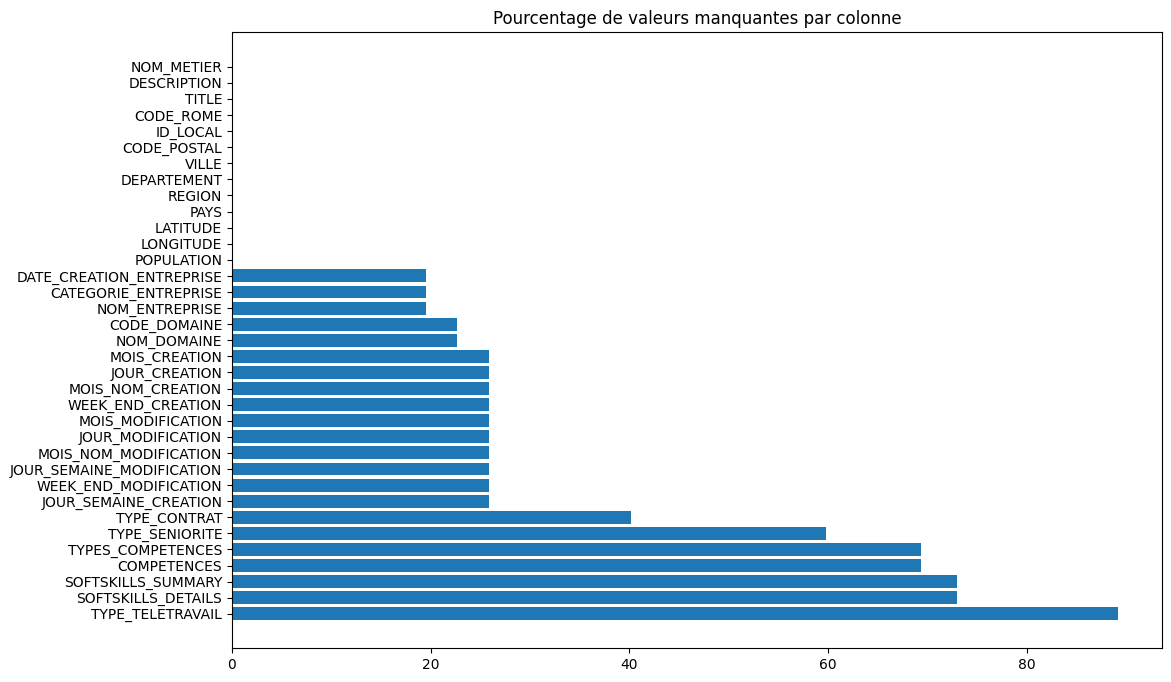

In [15]:
plt.figure(figsize=(12,8))
plt.barh(missing_df_sorted.index,missing_df_sorted.percentage)
plt.title('Pourcentage de valeurs manquantes par colonne');

## Top 5 du nombre de publication des offres selon les mois

In [16]:
month_count = df['MOIS_NOM_CREATION'].value_counts().head(5)
month_count

MOIS_NOM_CREATION
Avril      17147
Mars        2944
Mai         2928
Février     1652
Janvier      279
Name: count, dtype: int64

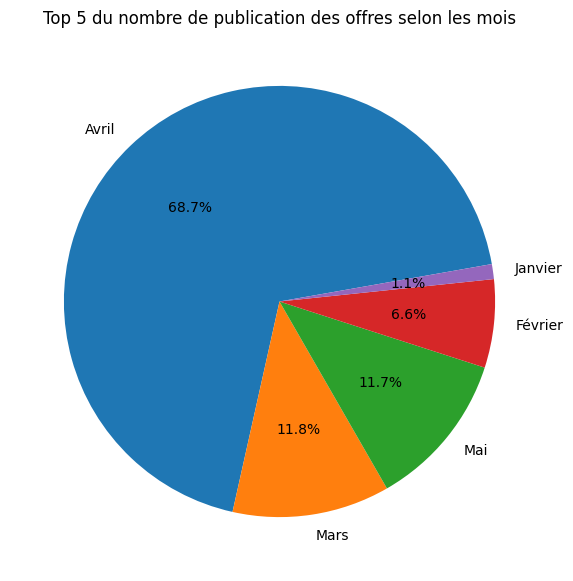

In [17]:
plt.figure(figsize=(7,7))
plt.pie(month_count,labels=month_count.index,autopct='%1.1f%%',startangle=10)
plt.title('Top 5 du nombre de publication des offres selon les mois');

## Top 15 des régions par nombre d'offres

In [18]:
region_counts = df['REGION'].value_counts().head(15)
region_counts

REGION
Île-de-France                 14080
Auvergne-Rhône-Alpes           4221
Occitanie                      2368
Pays de la Loire               2213
Provence-Alpes-Côte d'Azur     2121
Nouvelle-Aquitaine             1942
Bretagne                       1711
Hauts-de-France                1627
Grand Est                      1600
Centre-Val de Loire             915
Normandie                       889
Bourgogne-Franche-Comté         582
Guyane                          112
La Réunion                       51
Martinique                       39
Name: count, dtype: int64

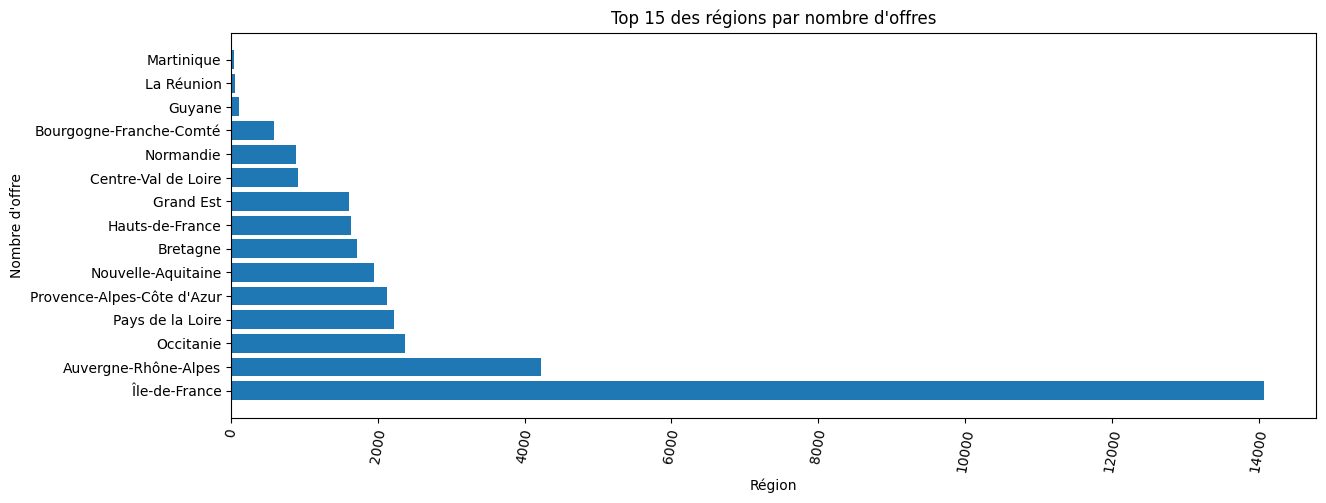

In [19]:
plt.figure(figsize=(14, 5))
plt.barh(region_counts.index,region_counts.values)
plt.title('Top 15 des régions par nombre d\'offres')
plt.xlabel('Région')
plt.ylabel('Nombre d\'offre')
plt.xticks(rotation=80);

## Top 15 des domaines qui recrute le plus

In [20]:
domain_counts = df['NOM_DOMAINE'].value_counts().head(15)
domain_counts

NOM_DOMAINE
Conception, recherche, études et développement                                   2750
Affaires et support technique client                                             2453
Systèmes d'information et de télécommunication                                   1678
Animation d'activités de loisirs                                                 1373
Direction, encadrement et pilotage de fabrication et production industrielles    1026
Hygiène Sécurité Environnement -HSE- industriels                                  990
Conception et mise en oeuvre des politiques publiques                             982
Mécanique, travail des métaux et outillage                                        841
Direction d'entreprise                                                            815
Développement territorial et emploi                                               723
Gestion et direction                                                              635
Gestion administrative banque et assurance

Text(0, 0.5, "nombre d'offre")

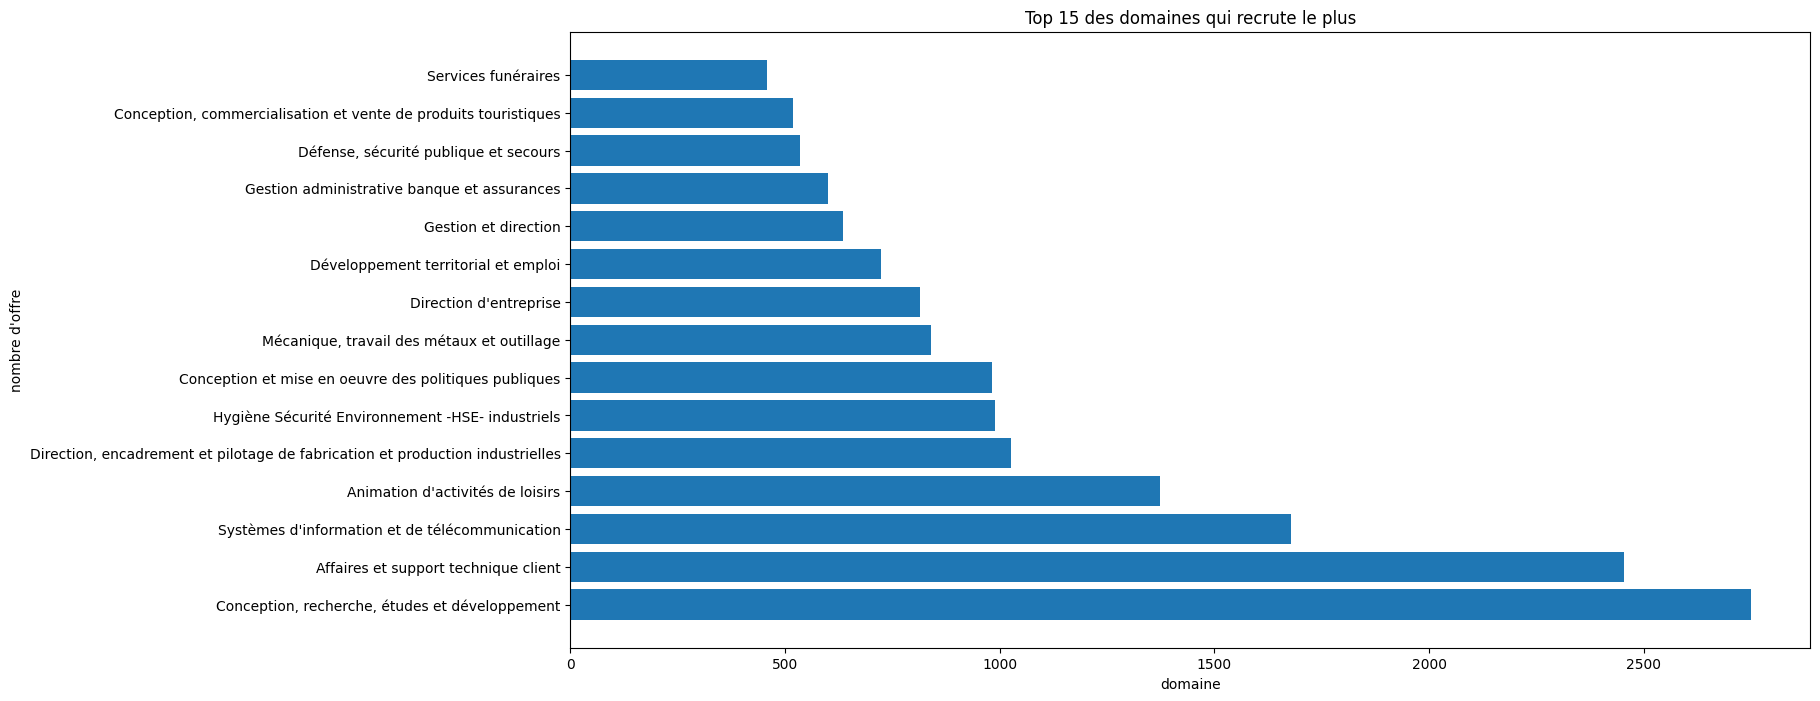

In [21]:
# Top domaines d'emploi
plt.figure(figsize=(16, 8))
plt.barh(domain_counts.index,domain_counts.values)
plt.title('Top 15 des domaines qui recrute le plus')
plt.xlabel('domaine')
plt.ylabel('nombre d\'offre')


## Top 15 des entreprises qui recrutent le plus

In [22]:
company_counts = df['NOM_ENTREPRISE'].value_counts().head(15)
company_counts

NOM_ENTREPRISE
LTD                         944
FORUMS DU CHAMP LACANIEN    443
CGI                         344
KINOUGARDE                  341
MANPOWER                    327
SAFRAN                      268
ISCOD                       263
MICHAEL KORS (FRANCE)       246
TN AMERICAS LLC             235
THALES                      234
CGI FRANCE                  233
CRIT                        208
OPENCLASSROOMS              208
RANDSTAD                    174
NAVAL GROUP                 174
Name: count, dtype: int64

Text(0, 0.5, "nombre d'offre")

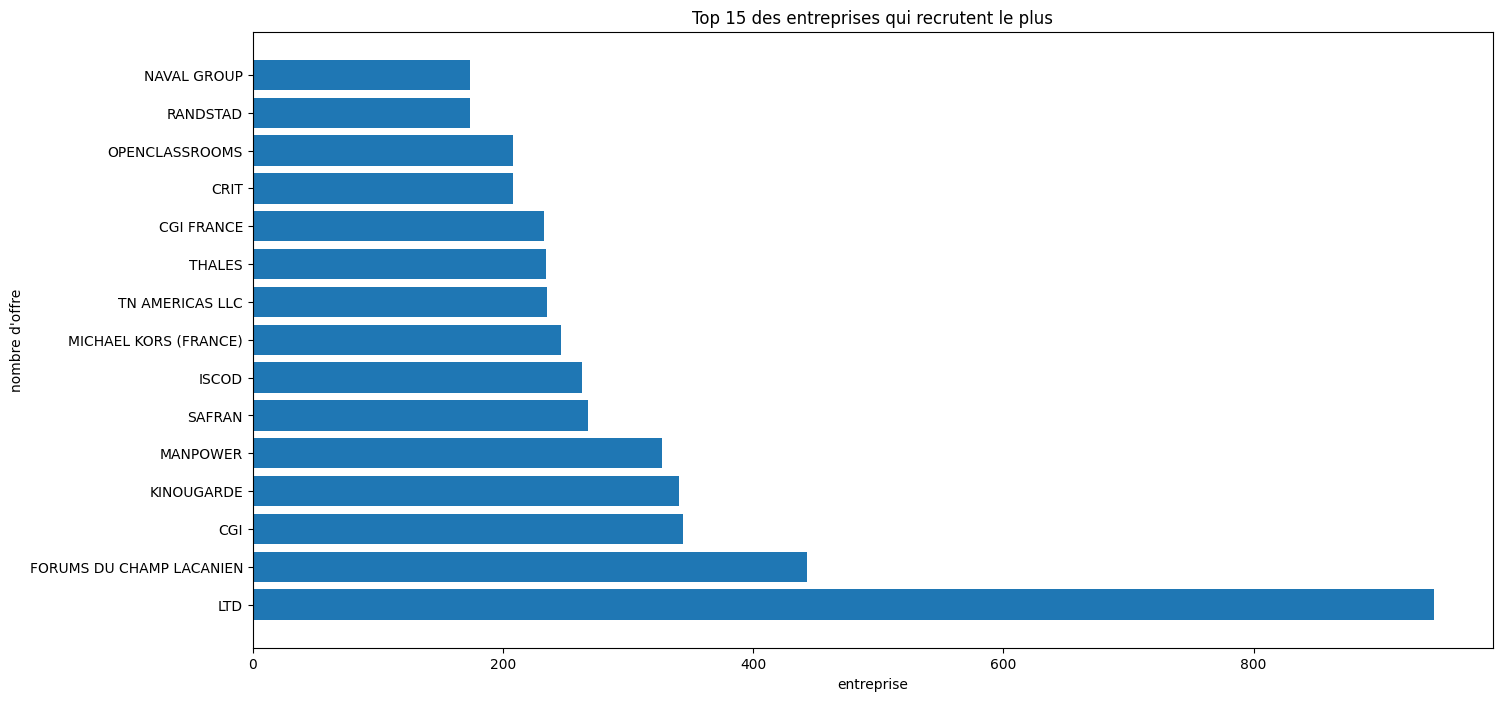

In [23]:
plt.figure(figsize=(16, 8))
plt.barh(company_counts.index, company_counts.values)
plt.title('Top 15 des entreprises qui recrutent le plus')
plt.xlabel('entreprise')
plt.ylabel('nombre d\'offre')

## Répartition des offres par catégorie d\'entreprise

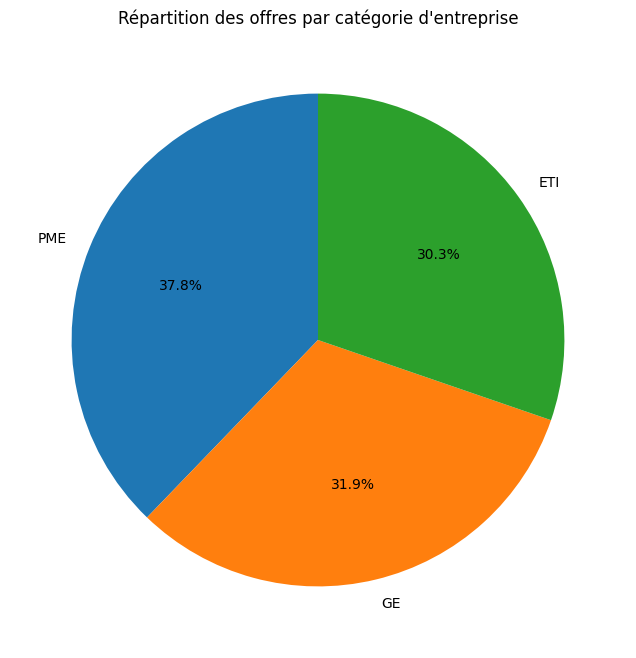

In [24]:
plt.figure(figsize=(12, 8))
category_counts = df['CATEGORIE_ENTREPRISE'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90)
plt.title('Répartition des offres par catégorie d\'entreprise');

# Top 15 des métier qui recrutent le plus

In [25]:
domain_counts_df = df[df['NOM_DOMAINE'].isin(domain_counts.index)]
company_counts_df = df[df['NOM_ENTREPRISE'].isin(company_counts.index)]

In [26]:
df['NOM_METIER_TRONQUE'] = df['NOM_METIER'].str.slice(0, 50) + '...'
metier_counts = df['NOM_METIER_TRONQUE'].value_counts().head(15)
metier_counts

NOM_METIER_TRONQUE
Recetteur / Recetteuse, Spécialiste test et valida...    5546
Analyste qualité des données, Analyste scientifiqu...    4341
Adjoint / Adjointe d'exploitation informatique, Ad...    3334
Chargé / Chargée d'étude informatique, Informatici...    2988
Architecte fonctionnel / Architecte fonctionnelle ...    2973
Administrateur / Administratrice de bases de donné...    2741
Chef de groupe logicien informaticien, Devops, Ing...    2380
Ingénieur / Ingénieure des systèmes d'information ...    1390
Administrateur / Administratrice Systèmes d'Inform...    1313
Analyste développeur / Analyste développeuse, Anal...    1249
Consultant / Consultante ERP, Consultant / Consult...    1139
Analyste prix / Analyste pricing, Assistant chargé...     937
Adjoint / Adjointe chef de centre de télétraitemen...     736
Contrôleur / Contrôleuse de réseau informatique, T...     661
Analyste informatique, Analyste réseau, Expert / E...     533
Name: count, dtype: int64

Text(0, 0.5, "nombre d'offre")

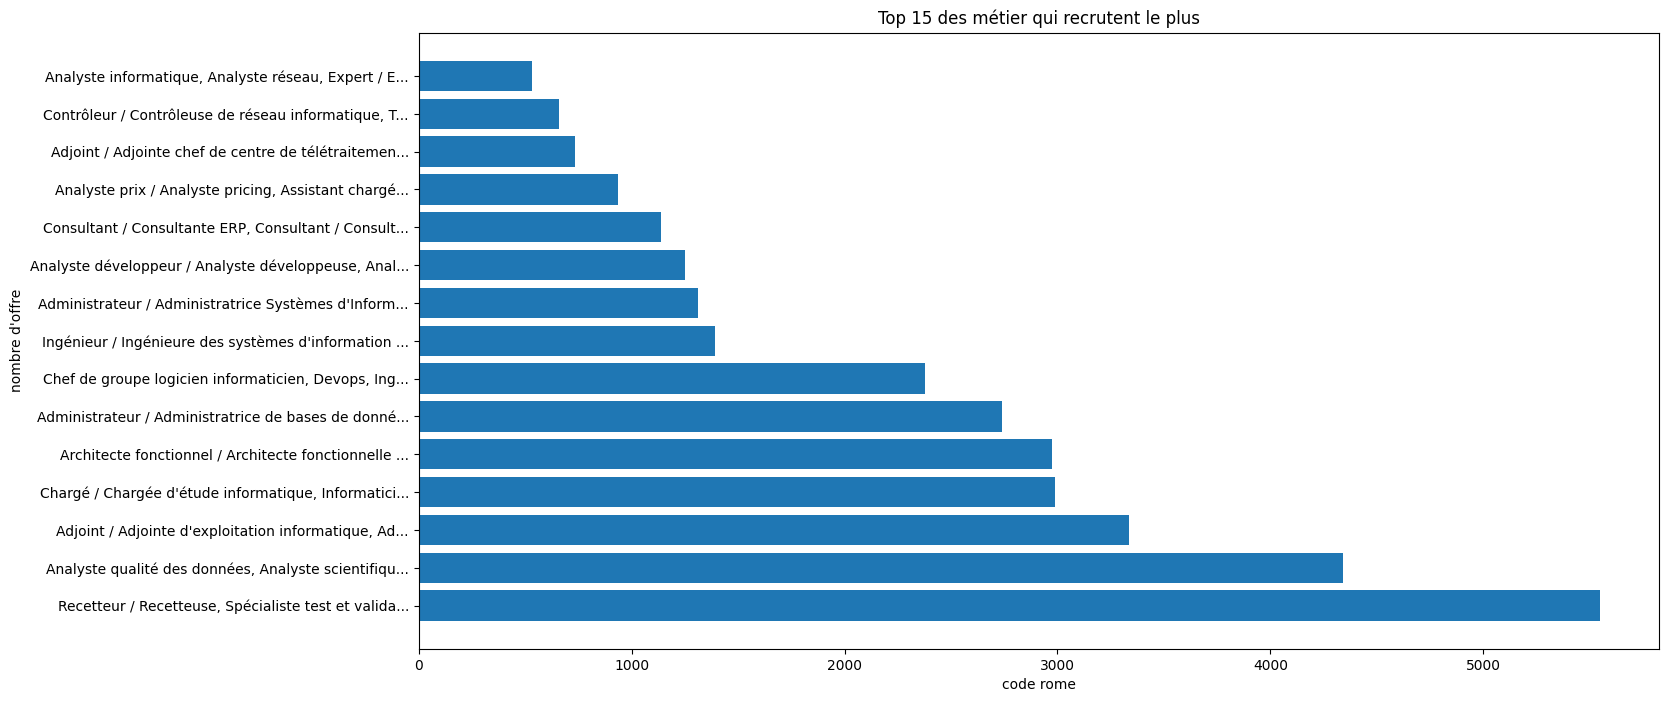

In [27]:
plt.figure(figsize=(16, 8))
plt.barh(metier_counts.index, metier_counts.values)
plt.title('Top 15 des métier qui recrutent le plus')
plt.xlabel('code rome')
plt.ylabel('nombre d\'offre')

## Relation entre le TOP 15 des domaines et des metiers

In [28]:
metier_counts_df = df[df['NOM_METIER_TRONQUE'].isin(metier_counts.index)]

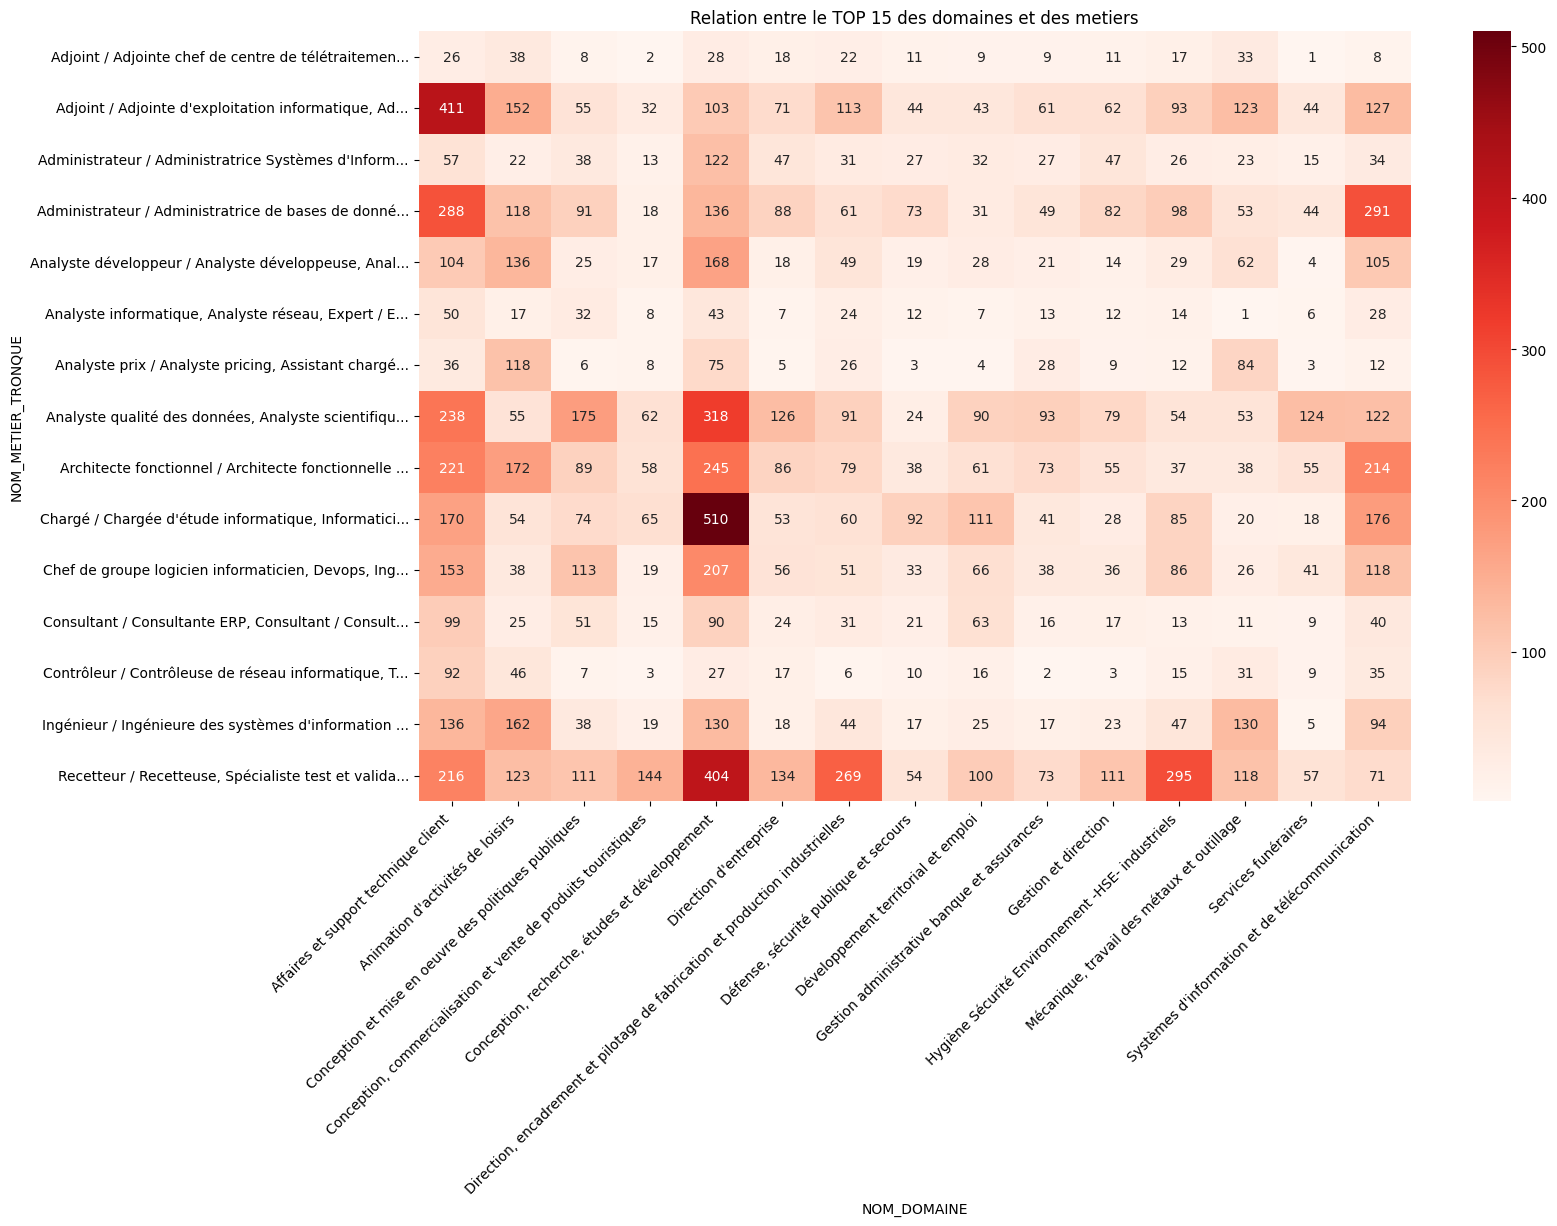

In [29]:
domaine_metier = pd.crosstab(metier_counts_df['NOM_METIER_TRONQUE'],domain_counts_df['NOM_DOMAINE']).head(15)
plt.figure(figsize=(16, 10))
sns.heatmap(domaine_metier, cmap='Reds', annot=True, fmt='d')
plt.title('Relation entre le TOP 15 des domaines et des metiers');
plt.xticks(rotation=45,ha='right');

## Relation entre le TOP 15 des domaines et des metiers

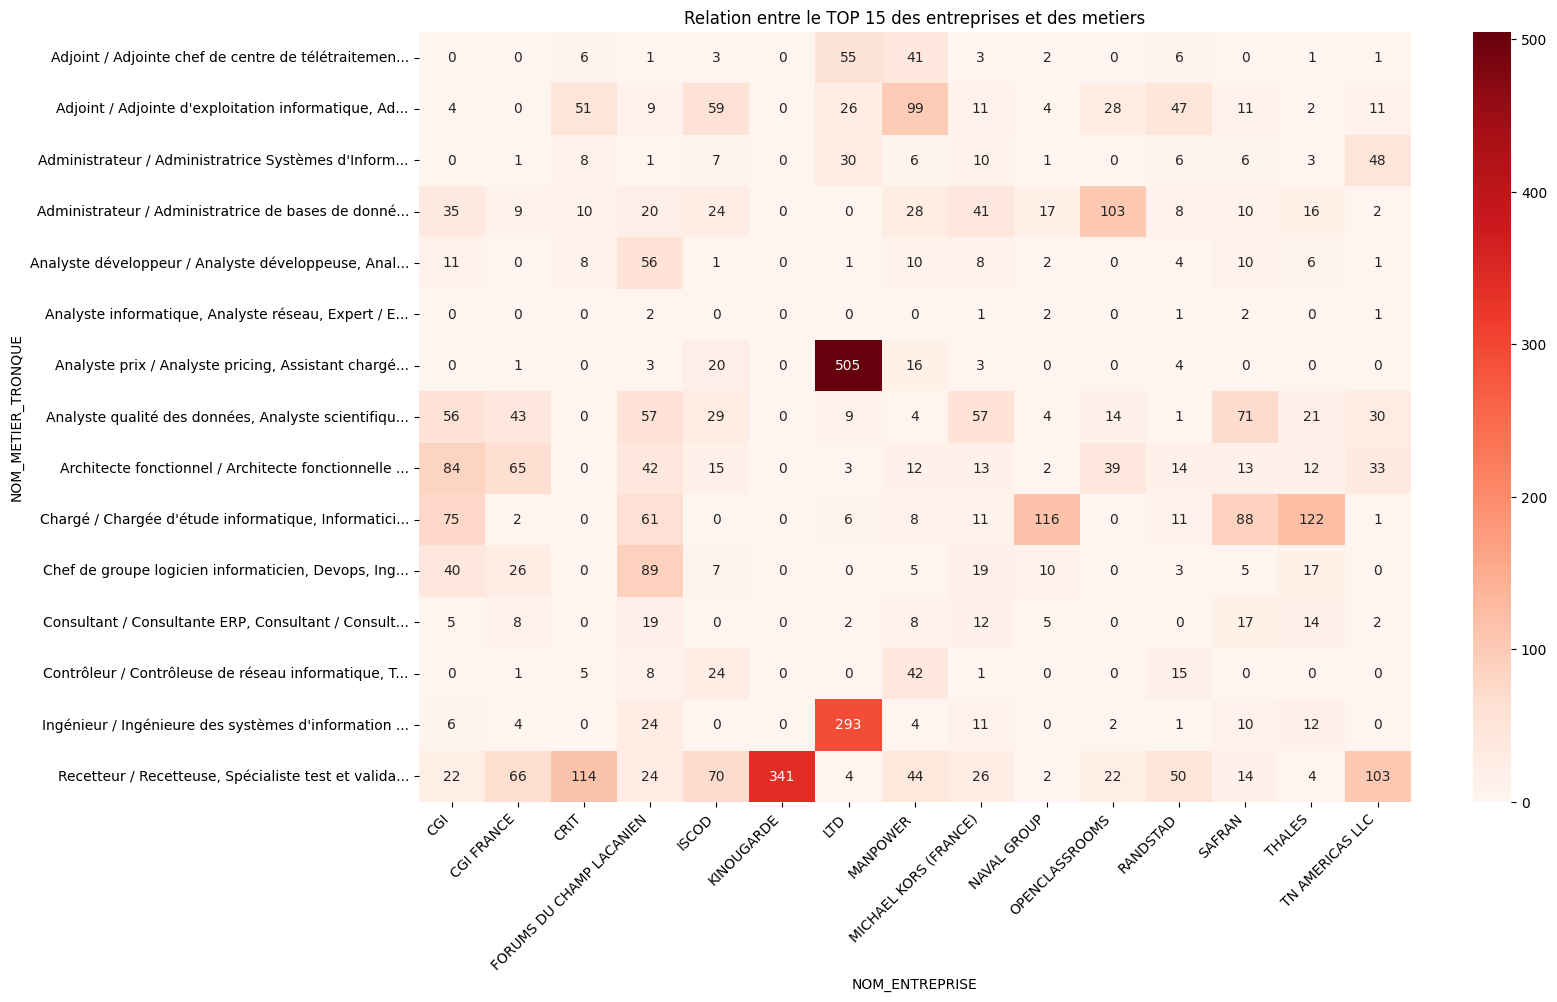

In [30]:
domaine_metier = pd.crosstab(metier_counts_df['NOM_METIER_TRONQUE'],company_counts_df['NOM_ENTREPRISE']).head(15)
plt.figure(figsize=(16, 10))
sns.heatmap(domaine_metier, cmap='Reds', annot=True, fmt='d')
plt.title('Relation entre le TOP 15 des entreprises et des metiers');
plt.xticks(rotation=45,ha='right');